## Imports

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import seaborn.objects as so;
import Units
sns.set_theme()


Reformatting test.txt as separate files. Not always needed, were designed this way for comparison to C++ output files.

Data imports

In [3]:
filepath = "../Data/Rust_Runs/Option2_Rust_Run2/";

data = np.loadtxt(filepath + "test.txt");
datanew  = data[ np.lexsort((data[:,1],data[:,0])) ]

AList= np.unique(datanew[:, 2])
VList = np.unique(datanew[:,3])

#AList = np.loadtxt("./Data/2param_acc_Option2/Acceleration.txt");
#VList = np.loadtxt("./Data/2param_acc_Option2/LatticeDepth.txt");

AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);
MomProb = np.loadtxt(filepath +  "MomProb.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

/tmp/ipykernel_28617/1708206952.py:12: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);


In [4]:
print(AList[50], VList[25])
datamom =np.reshape(MomProb, (AList.size,VList.size,11));
print(datamom[50,25,:])


0.0 10.0
[7.79475651e-04 1.07683464e-02 7.46451016e-03 4.35311148e-01
 1.19488382e-01 2.64746489e-02 5.98152566e-02 3.08016659e-01
 2.30293604e-04 3.02351607e-02 1.41611874e-03]


## Simulating Experimental Data

In [67]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));

P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
for i in range(len(AList)):
    P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
    #No errors

    Runs=50; # How many simulated data do we want
    outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
    unique, frequency = np.unique(outcomes, return_counts = True);
    his = np.bincount(outcomes,minlength=11)
    P_simulated[i] = his/np.sum(his)

There is a possibility of a bug here. I dont know what the start and end values for minlength are

In [68]:
def KLDivergence( P, Q):
    if len(P) != len(Q):
        return None;
    sum =0;

    for i in range(len(P)):
        sum = np.dot(P, np.log2( np.divide(P, Q)));

    return sum;

def JSDivergence( P, Q):
    M = (P+Q)/2;
    JS = 0.5 * ( KLDivergence(P,M) + KLDivergence(Q, M));
    return JS;


In [69]:
P_simulated[P_simulated==0.0]= 1.0*10**(-40);

Text(0.5, 1.0, 'Measurements=50')

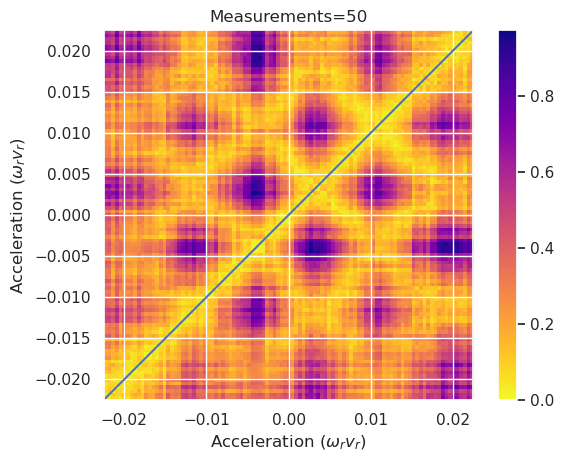

In [70]:

acc = AList

no_of_values = len(AList);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in range(no_of_values):
    for j in range(no_of_values):
        JSDivergenceMatrix [i][j]= JSDivergence(P_simulated[i], P_simulated[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]    *1.0, acc[-1]    *1.0, acc[-1]    *1.0, acc[0]     *1.0])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]    *1.0, AList[indices_JS[0]]    *1.0)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Acceleration ($\omega_r v_r$)")
plt.ylabel("Acceleration ($\omega_r v_r$)")
plt.title("Measurements="+str(Runs))
#plt.savefig("JS_acc.png")

Text(0.5, 1.0, 'Measurements=50')

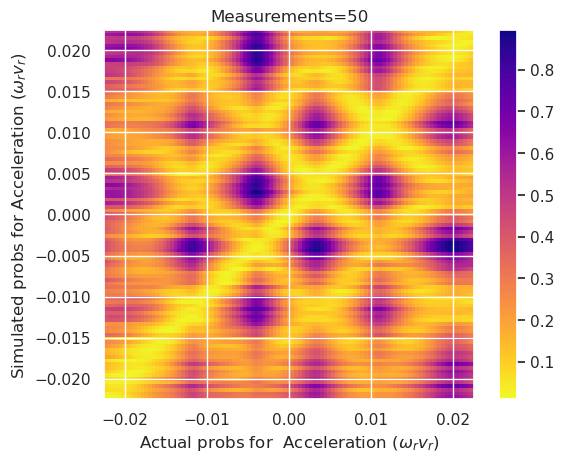

In [71]:

acc = AList

no_of_values = len(AList);
JSDivergenceMatrix=np.zeros((no_of_values, no_of_values)) ;

for i in range(no_of_values):
    for j in range(no_of_values):
        JSDivergenceMatrix [i][j]= JSDivergence(P_simulated[i], P_actual[j])

plt.imshow(JSDivergenceMatrix, cmap="plasma_r", extent=[acc[0]    *1.0, acc[-1]    *1.0, acc[-1]    *1.0, acc[0]     *1.0])
indices_JS = np.where(JSDivergenceMatrix==0)
plt.plot(AList[indices_JS[1]]    *1.0, AList[indices_JS[0]]    *1.0)
plt.gca().invert_yaxis();
plt.colorbar()
plt.xlabel("Actual probs for  Acceleration ($\omega_r v_r$)")
plt.ylabel("Simulated probs for Acceleration ($\omega_r v_r$)")
plt.title("Measurements="+str(Runs))
#plt.savefig("JS_acc.png")

In [72]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));
fig= plt.figure(figsize=(10,8))
P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([100, 1000, 20000, 50000]);
JSDivergenceMatrix= np.zeros( (len(AList),1));
for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        P_simulated[i] = his/np.sum(his)
        P_simulated[P_simulated==0.0]= 1.0*10**(-40);
        JSDivergenceMatrix[i]=KLDivergence( P_actual[50], P_simulated[i])
    
    plt.plot(AList, np.log(JSDivergenceMatrix), label=str(r))

KLDivergenceMatrix_real= np.zeros( (len(AList),1));
for j in range(len(AList)):
    KLDivergenceMatrix_real[j]=KLDivergence( P_actual[50], P_actual[j])

plt.plot(AList, np.log( KLDivergenceMatrix_real) ,'x', label="Theory")
plt.legend(title= "$N_m$")
plt.ylabel("$\log D_{KL}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )$")
plt.xlabel("a $(\omega_r v_r)$")
plt.title("$\log D_{KL}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )$ vs no. of measurements $N_m$")

KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>

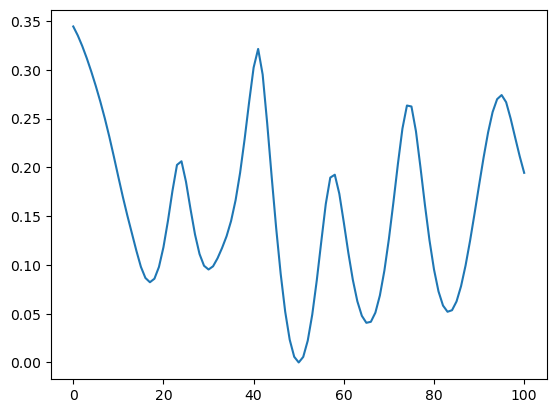

In [ ]:
plt.plot([JSDivergence(P_actual[i] , P_actual[50]) for i in range(len(AList))])

In [ ]:
P_actual

array([[0.00135996, 0.09032409, 0.07759137, ..., 0.20459082, 0.0527842 ,
        0.00230287],
       [0.00101674, 0.08482782, 0.07800807, ..., 0.20591547, 0.05538301,
        0.00240315],
       [0.00074153, 0.07970525, 0.07817916, ..., 0.20483383, 0.05764509,
        0.0025021 ],
       ...,
       [0.00037199, 0.00054887, 0.01130016, ..., 0.03263234, 0.10678147,
        0.03096364],
       [0.00039146, 0.00068417, 0.01059426, ..., 0.02906217, 0.10547487,
        0.03191569],
       [0.0004122 , 0.00086376, 0.01059894, ..., 0.02547185, 0.10363939,
        0.03282204]])

/tmp/ipykernel_10900/1155550664.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(AList, np.log( KLDivergenceMatrix_real) , label="Theory")


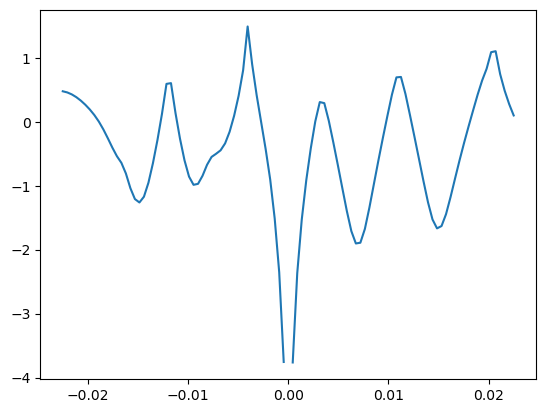

In [ ]:
plt.plot(AList, np.log( KLDivergenceMatrix_real) , label="Theory")

Text(0.5, 1.0, "$ D_{JS}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )$ vs no. of measurements $N_m$")

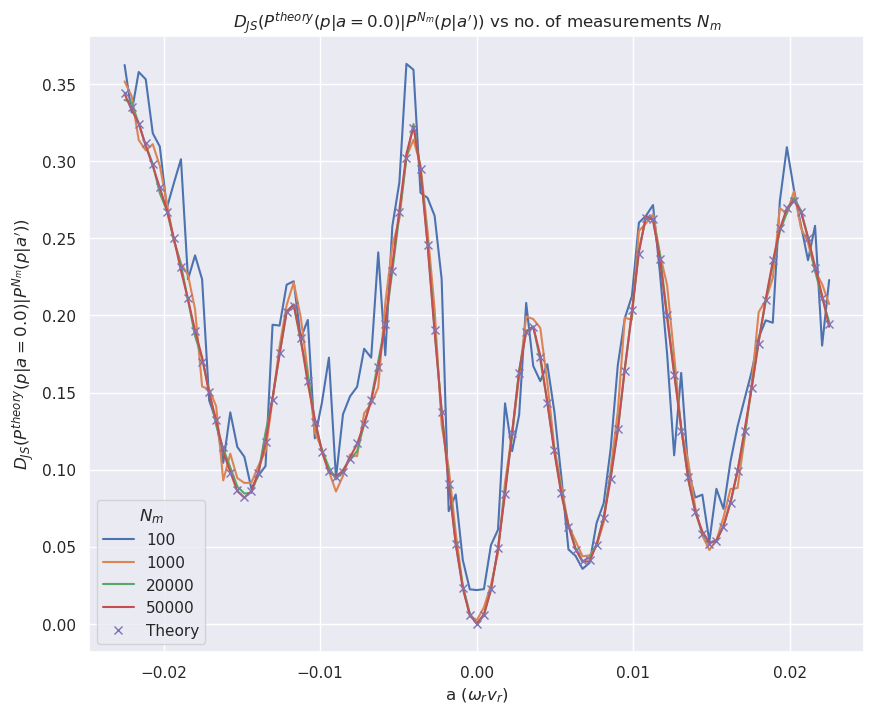

In [ ]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));
fig= plt.figure(figsize=(10,8))
P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([100, 1000, 20000, 50000]);
JSDivergenceMatrix= np.zeros( (len(AList),1));
for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        P_simulated[i] = his/np.sum(his)
        P_simulated[P_simulated==0.0]= 1.0*10**(-40);
        JSDivergenceMatrix[i]=JSDivergence( P_actual[50], P_simulated[i])
    
    plt.plot(AList, JSDivergenceMatrix, label=str(r))

KLDivergenceMatrix_real= np.zeros( (len(AList),1));
for j in range(len(AList)):
    KLDivergenceMatrix_real[j]=JSDivergence( P_actual[50], P_actual[j])

plt.plot(AList,  KLDivergenceMatrix_real ,'x', label="Theory")
plt.legend(title= "$N_m$")
plt.ylabel("$D_{JS}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )$")
plt.xlabel("a $(\omega_r v_r)$")
plt.title("$ D_{JS}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )$ vs no. of measurements $N_m$")

Text(0.5, 1.0, "$ |\\delta D_{JS}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )|$ vs no. of measurements $N_m$")

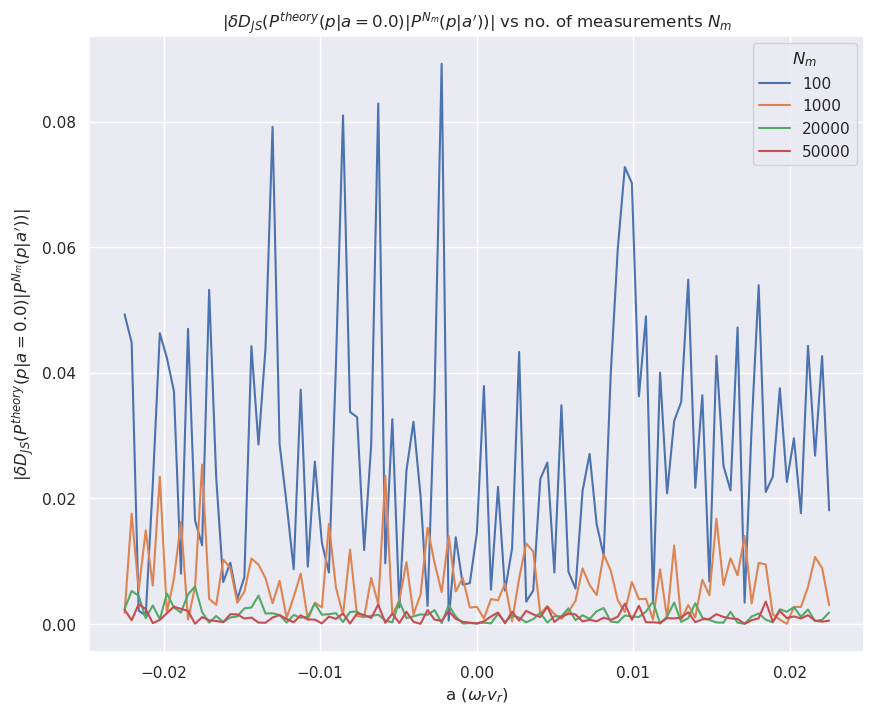

In [ ]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));
fig= plt.figure(figsize=(10,8))
P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([100, 1000, 20000, 50000]);
JSDivergenceMatrix= np.zeros( (len(AList),1));


KLDivergenceMatrix_real= np.zeros( (len(AList),1));
for j in range(len(AList)):
    KLDivergenceMatrix_real[j]=JSDivergence( P_actual[50], P_actual[j])

for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        P_simulated[i] = his/np.sum(his)
        P_simulated[P_simulated==0.0]= 1.0*10**(-40);
        JSDivergenceMatrix[i]=JSDivergence( P_actual[50], P_simulated[i])
    
    plt.plot(AList,np.abs( JSDivergenceMatrix- KLDivergenceMatrix_real), label=str(r))


#plt.plot(AList,  KLDivergenceMatrix_real ,'x', label="Theory")
plt.legend(title= "$N_m$")
plt.ylabel("$|\delta D_{JS}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )|$")
plt.xlabel("a $(\omega_r v_r)$")
plt.title("$ |\delta D_{JS}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )|$ vs no. of measurements $N_m$")

Text(0.5, 1.0, "$ |\\delta D_{KL}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )|$ vs no. of measurements $N_m$")

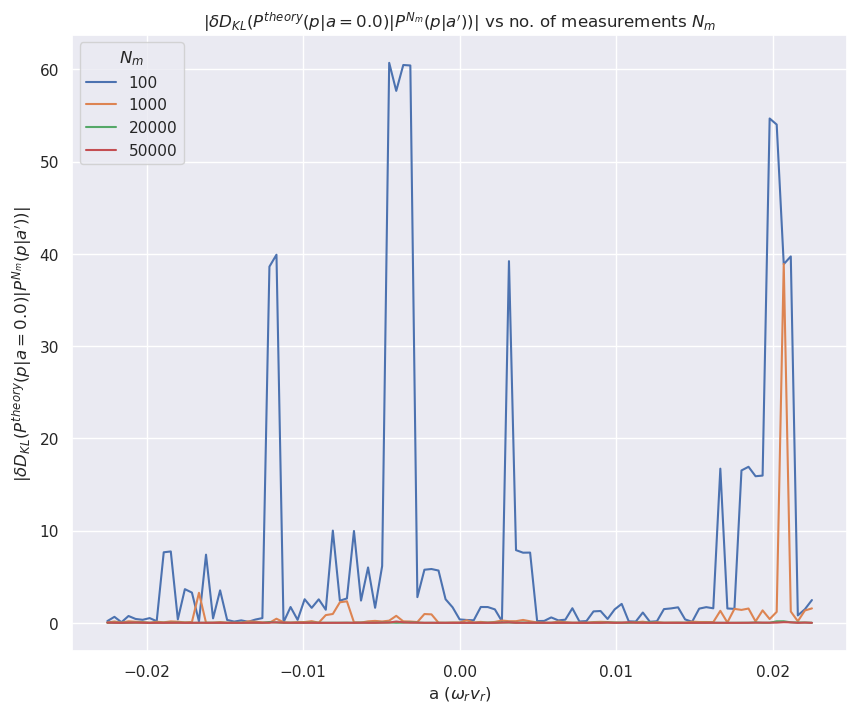

In [ ]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));
fig= plt.figure(figsize=(10,8))
P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([100, 1000, 20000, 50000]);
JSDivergenceMatrix= np.zeros( (len(AList),1));


KLDivergenceMatrix_real= np.zeros( (len(AList),1));
for j in range(len(AList)):
    KLDivergenceMatrix_real[j]=KLDivergence( P_actual[50], P_actual[j])

for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        P_simulated[i] = his/np.sum(his)
        P_simulated[P_simulated==0.0]= 1.0*10**(-40);
        JSDivergenceMatrix[i]=KLDivergence( P_actual[50], P_simulated[i])
    
    plt.plot(AList,np.abs( JSDivergenceMatrix- KLDivergenceMatrix_real), label=str(r))


#plt.plot(AList,  KLDivergenceMatrix_real ,'x', label="Theory")
plt.legend(title= "$N_m$")
plt.ylabel("$|\delta D_{KL}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )|$")
plt.xlabel("a $(\omega_r v_r)$")
plt.title("$ |\delta D_{KL}(P^{theory}(p|a=0.0)|P^{N_m}(p|a') )|$ vs no. of measurements $N_m$")

## Bayesian

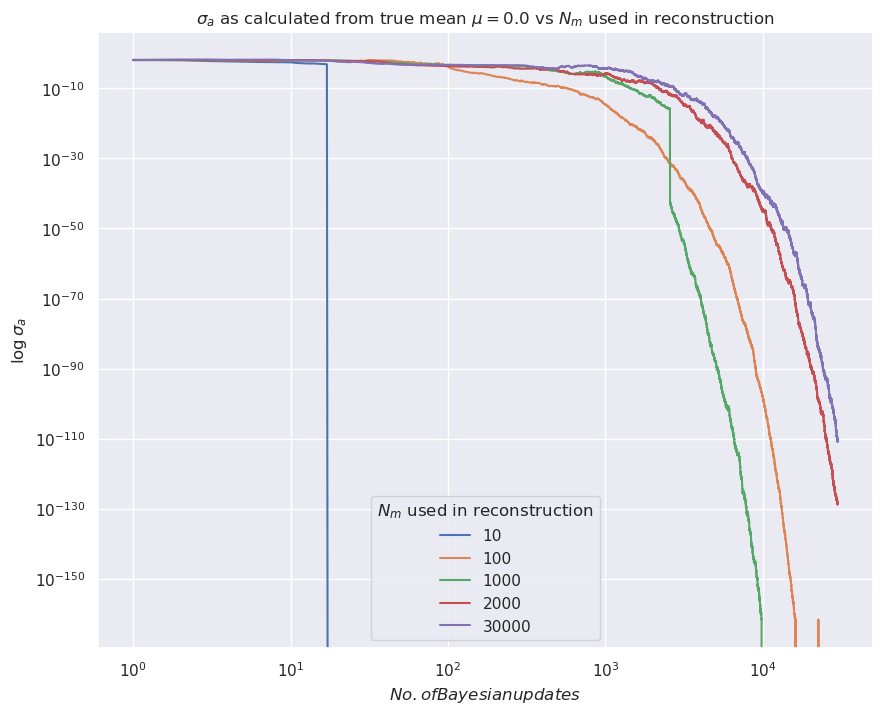

In [ ]:

PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));
fig= plt.figure(figsize=(10,8))
P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([ 10,100,1000,2000, 30000]);
#runs=np.array([20000]);

for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        P_simulated[i] = his/np.sum(his)
        #P_simulated[P_simulated==0.0]= 1.0*10**(-40);

    Runs=30000; # How many simulated data do we want
    outcomes_second = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated[int(( AList.shape[0]-1)/2)]);
    #unique, frequency = np.unique(outcomes_second, return_counts = True);


    PaVprior = np.full(AList.size,1)/(AList.size);
    np.sum(PaVprior)

    stdTimeprob=[];
    meanTime=[];
    plotPaV=np.array([PaVprior]);

    counter =0;
    for m in outcomes_second:
        for i in range(AList.size):
            #indexpair = AVListIndex[i];
            #MomentumProbabilities = MomProb[i];

            #PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
            PaVprior[i] *= P_simulated[i,m];
            PaVprior/=np.sum(PaVprior)

        #counter+=1;
        #if counter % 50 == 0:
        #    plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
        

        
        mean = np.dot(AList, PaVprior)#bayesian mean
        truemean= AList[int((AList.shape[0]-1)/2)]# 0.0;#true mean
        sq = np.dot (np.power(AList, 2), PaVprior)
        meanTime.append(mean);
        stdTimeprob.append(np.sqrt( sq- truemean**2));# true mean or bayesian mean

    plt.loglog(range(1, len(outcomes_second)+1),np.array(stdTimeprob), label = str(r))
    #plt.plot(range(1,len(outcomes_second)+1), np.log(np.abs(np.array(meanTime))), label = str(r))
plt.ylabel("$\log \sigma_a$")
plt.xlabel("$No. of Bayesian updates$")
plt.legend(title="$N_m$ used in reconstruction")
plt.title("$\sigma_a$ as calculated from true mean $\mu=0.0$ vs $N_m$ used in reconstruction")
plt.show()

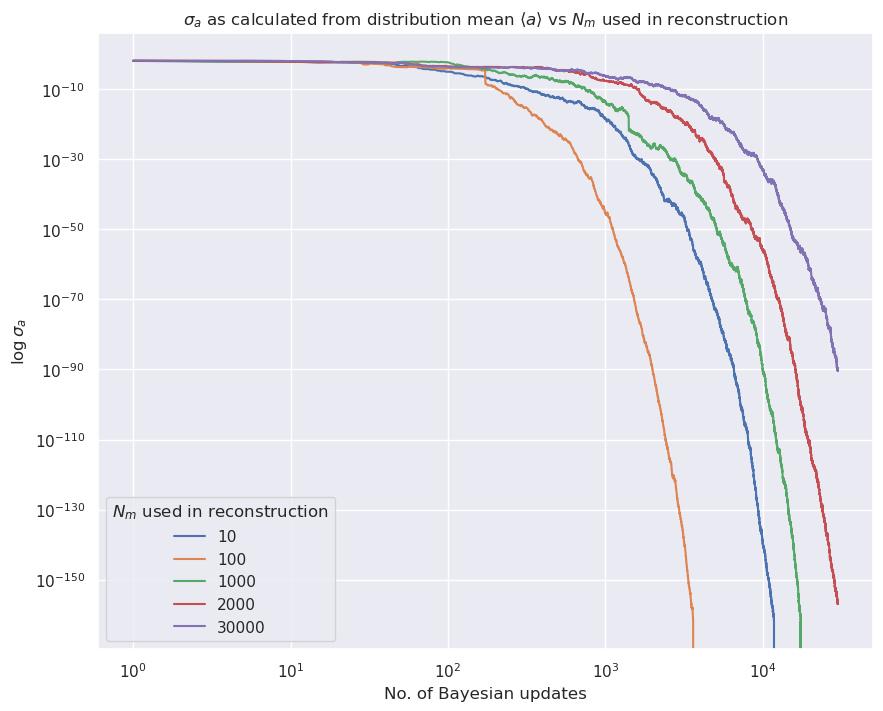

In [ ]:

PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));
fig= plt.figure(figsize=(10,8))
P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([ 10,100,1000,2000, 30000]);
#runs=np.array([20000]);

for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        P_simulated[i] = his/np.sum(his)
        #P_simulated[P_simulated==0.0]= 1.0*10**(-40);

    Runs=30000; # How many simulated data do we want
    outcomes_second = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated[int(( AList.shape[0]-1)/2)]);
    #unique, frequency = np.unique(outcomes_second, return_counts = True);


    PaVprior = np.full(AList.size,1)/(AList.size);
    np.sum(PaVprior)

    stdTimeprob=[];
    meanTime=[];
    plotPaV=np.array([PaVprior]);

    counter =0;
    for m in outcomes_second:
        for i in range(AList.size):
            #indexpair = AVListIndex[i];
            #MomentumProbabilities = MomProb[i];

            #PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
            PaVprior[i] *= P_simulated[i,m];
            PaVprior/=np.sum(PaVprior)

        #counter+=1;
        #if counter % 50 == 0:
        #    plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
        

        
        mean = np.dot(AList, PaVprior)#bayesian mean
        truemean= AList[int((AList.shape[0]-1)/2)]# 0.0;#true mean
        sq = np.dot (np.power(AList, 2), PaVprior)
        meanTime.append(mean);
        stdTimeprob.append(np.sqrt( sq- mean**2));# true mean or bayesian mean

    plt.loglog(range(1, len(outcomes_second)+1),np.array(stdTimeprob), label = str(r))
    #plt.plot(range(1,len(outcomes_second)+1), np.log(np.abs(np.array(meanTime))), label = str(r))
plt.ylabel("$\log \sigma_a$")
plt.xlabel("No. of Bayesian updates")
plt.legend(title="$N_m$ used in reconstruction")
plt.title("$\sigma_a$ as calculated from distribution mean $\langle a \\rangle$ vs $N_m$ used in reconstruction")
plt.show()

In [ ]:
PaVprior.shape

(101,)

/tmp/ipykernel_28617/2270839944.py:55: RuntimeWarning: invalid value encountered in divide
  PaVprior/=np.sum(PaVprior)


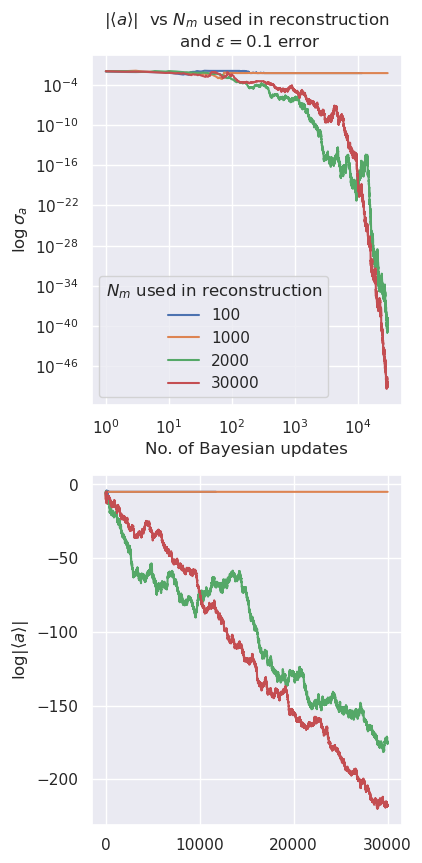

In [15]:
epsilon = 0.1;
P_error = np.array( [ 0.00158886 ,  0.0289448  , 0.0129811 ,    0.17899  ,  0.028321,   0.0413507  ,  0.559008  , 0.0504661 ,  0.0788694  , 0.0194702 ,9.67359e-06]);



PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape( MomProb, ( AList.size, VList.size,11));

P_actual=np.array(datamom[:,int(( VList.shape[0]-1)/2),:]); # Fix this hardcoded value #FUCK
P_simulated = np.zeros(P_actual.shape); 
runs = np.array([ 100,1000,2000, 30000]);
#runs=np.array([20000]);
fig, axs = plt.subplots(2)
fig.set_figheight(10);
fig.set_figwidth(4);


for r in runs:
    for i in range(len(AList)):
        P_actual[i]=P_actual[i]/np.sum(P_actual[i]);
        #No errors

        Runs=r; # How many simulated data do we want
        outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_actual[i]);
        unique, frequency = np.unique(outcomes, return_counts = True);
        his = np.bincount(outcomes,minlength=11)
        #P_simulated[i] = (1-epsilon)*his/np.sum(his)+ epsilon*P_error;
        P_simulated[i] = his/np.sum(his);
        P_simulated[i]= P_simulated[i]/np.sum(P_simulated[i])
        #P_simulated[P_simulated==0.0]= 1.0*10**(-40);

    Runs=30000; # How many simulated data do we want
    P_simulated_noise = (1-epsilon)*P_simulated[int(( AList.shape[0]-1)/2)]+ epsilon*P_error;
    P_simulated_noise = P_simulated_noise/np.sum(P_simulated_noise);
    outcomes_second = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated_noise);
    #unique, frequency = np.unique(outcomes_second, return_counts = True);


    PaVprior = np.full(AList.size,1)/(AList.size);
    np.sum(PaVprior)

    stdTimeprob=[];
    meanTime=[];
    plotPaV=np.array([PaVprior]);

    counter =0;
    for m in outcomes_second:
        for i in range(AList.size):
            #indexpair = AVListIndex[i];
            #MomentumProbabilities = MomProb[i];

            #PaVprior[indexpair[0]] *= (MomentumProbabilities[m])
            PaVprior[i] *= P_simulated[i,m];
            PaVprior/=np.sum(PaVprior)

        #counter+=1;
        #if counter % 50 == 0:
        #    plotPaV=np.append(plotPaV,[PaVprior], axis=0); 
        

        
        mean = np.dot(AList, PaVprior)#bayesian mean
        truemean= AList[int((AList.shape[0]-1)/2)]# 0.0;#true mean
        sq = np.dot (np.power(AList, 2), PaVprior)
        meanTime.append(mean);
        stdTimeprob.append(np.sqrt( sq- truemean**2));# true mean or bayesian mean

    axs[0].loglog(range(1, len(outcomes_second)+1),np.array(stdTimeprob), label = str(r))
    axs[1].plot(range(1, len(outcomes_second)+1), np.log( np.abs( meanTime)), label=str(r));
    #plt.plot(range(1,len(outcomes_second)+1), np.log(np.abs(np.array(meanTime))), label = str(r))
axs[0].set_ylabel("$\log \sigma_a$")
axs[0].set_xlabel("No. of Bayesian updates")
axs[0].legend(title="$N_m$ used in reconstruction")
axs[0].set_title("$\sigma_a$ as calculated from distribution mean $\mu$ vs $N_m$ used in reconstruction\n and $\epsilon=$"+str(epsilon) + " error")


axs[1].set_ylabel("$\log |\langle a\\rangle|$")
axs[0].set_xlabel("No. of Bayesian updates")
axs[0].legend(title="$N_m$ used in reconstruction")
axs[0].set_title("$|\langle a \\rangle|$  vs $N_m$ used in reconstruction\n and $\epsilon=$"+str(epsilon) + " error")
plt.show()